In [1]:
#Importação das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup as bsp
from urllib.request import urlopen
import numpy as np

In [2]:
#=========================================
# Dados do contágio de Covid-19 no Brasil 
# Fonte: https://g1.globo.com/
#=========================================

In [3]:
#Fazendo o request. O ideal é usar Try/Except considerando que nem sempre teremos status 200 no request.
html = urlopen("https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/21/casos-de-coronavirus-no-brasil-em-21-de-marco.ghtml")

In [4]:
#Fazendo leitura do html com o BeautifulSoup
res = bsp(html.read())

In [5]:
#Pegando os dados da tag que nos interessa, passando pra uma string e convertendo em um DataFrame do Pandas
tags = res.find_all('div',{'class':'show-table content-media content-media--normal'})
table_str = str(tags)
df_br = pd.read_html(table_str, index_col=None)[0]

In [6]:
#Nomeando as colunas com a primeira linha (Pois veio da string)
df_br.columns = df_br.iloc[0]
#Excluind a primeira (títulos na string) e a última linha (totais) e atualizando os índices
df_br = df_br.drop(df_br.index[0])
df_br = df_br.drop(df_br.index[-1])
df_br = df_br.reset_index(drop=True)

In [7]:
#=================================================
# Dados do contágio de Covid-19 no Espirito Santo 
# Fonte: https://saude.es.gov.br/
#=================================================

In [8]:
html = urlopen("https://saude.es.gov.br/Not%C3%ADcia/secretaria-da-saude-divulga-24o-boletim-de-covid-19")

In [9]:
res = bsp(html.read())

In [10]:
tags = res.find_all('table',{'width':'624'})
#tags_mun = res.find_all('td',{})
table_str = str(tags)
df_es = pd.read_html(table_str, index_col=None)[0]

In [11]:
#Como as regiões e municípios são tags tr separadas, preferi remover as regiões. Também os totais, NaN e colunas duplicadas.
val_exc = ['CENTRAL','METROPOLITANA','NORTE','SUL','Total','Total Geral','NaN']
for c in val_exc:
    df_es.drop(df_es.loc[df_es[0]==c].index, inplace=True)
df_es = df_es.dropna()
df_es = df_es.drop([1,3,5,7],axis=1)

In [12]:
#Nomeando as colunas com a primeira linha (Pois veio da string)
df_es = df_es.reset_index(drop=True)
df_es.columns = df_es.iloc[0]
#Excluindo do df todas as linhas com os títulos na string e atualizando os índices
val_exc = list(df_es.loc[df_es[df_es.columns[0]]==df_es.columns[0]].index)
df_es = df_es.drop(val_exc)
df_es = df_es.reset_index(drop=True)

In [13]:
df_es_conf = df_es[df_es['Caso confirmado'] != '0']

In [14]:
df_es_conf = df_es_conf.sort_values(by=['Caso confirmado'], ascending=False)

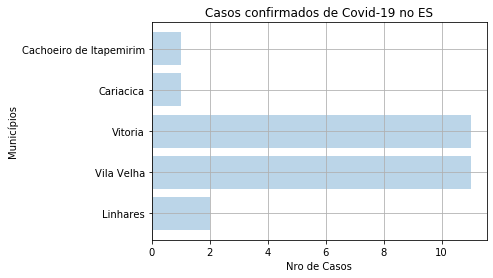

In [31]:
mun = np.array(df_es_conf['Município de residência'])
y_pos = np.arange(len(mun))
casos = np.array(df_es_conf['Caso confirmado'].astype(str).astype(int))

plt.barh(y_pos, casos, align='center', alpha=0.3)
plt.yticks(y_pos, mun)
plt.xlabel('Nro de Casos')
plt.ylabel('Municípios')
plt.title('Casos confirmados de Covid-19 no ES')
plt.grid(True)

plt.show()

In [16]:
df_br_conf = df_br[df_br['Secretarias da Saúde'] != '0']
df_br_conf['Secretarias da Saúde'] = df_br_conf['Secretarias da Saúde'].astype(str).astype(int)
df_br_conf = df_br_conf.sort_values(by=['Secretarias da Saúde'], ascending=False)

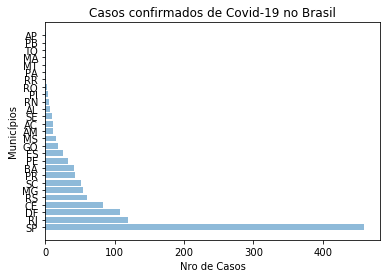

In [17]:
est = np.array(df_br_conf['Estado'])
y_pos = np.arange(len(est))
casos = np.array(df_br_conf['Secretarias da Saúde'].astype(str).astype(int))

plt.barh(y_pos, casos, align='center', alpha=0.5 )
plt.yticks(y_pos, est)
plt.xlabel('Nro de Casos')
plt.ylabel('Municípios')
plt.title('Casos confirmados de Covid-19 no Brasil')

plt.show()